In [1]:
import pandas as pd
from random import seed, randrange
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
# we need to remove some stopwords form the nltk library stopwords so that we can classify the negative and postive reviews properly
# so we will be making our own customized stopwords

In [3]:
stopwords = ['from', "she's", 'theirs', 'be', 'won', 'shouldn', 'should', 'or', 'were', 'she', "shouldn't", 'until', 'himself', 'd', 'at', 'than', 'aren', "doesn't", 've', 'o', 'mustn', "you've", 'ours', 'wasn', 'but', 'once', 'there', "didn't", 'we', 'has', 'am', 'of', 'own', "you'd", 'in', 'he', "shan't", "mightn't", "don't", 'having', 'with', 'my', 'its', 'had', 'y', 'yourselves', 'didn', 'your', 'each', "haven't", 'yourself', 'and', 'is', 'nor', 'who', 'whom', 'couldn', 'this', 'mightn', 'shan', 'have', 'for', 'her', 'hers', 'other', 'during', 'herself', 'themselves', 'here', 'them', 's', 'hadn', "it's", 'so', "mustn't", 'did', 'about', 'after', "hadn't", 'haven', "you'll", 'can', 'just', 'isn', 'the', 'our', 'by', 'further', 'do', 'on', 're', 'doing', "aren't", 'off', 'some', 'an', 'only', 'over', 'me', 'while', 'will', 'too', 'i', 'under', 'more', "you're", 'their', 'you', 'as', 'ourselves', 'both', 'where', 'then', "hasn't", "weren't", "won't", 'before', 'are', "wouldn't", 'needn', 'because', 'doesn', 'into', 'that', 'between', "wasn't", 'it', 'him', 'up', 'above', 'his', 'these', 'm', 'been', "couldn't", 'to', 'those', 'same', 'don', 'out', 'ma', 'below', 'being', 'such', 'what', 'wouldn', "that'll", 'itself', 'hasn', "isn't", 'again', 'through', 'very', 'll', 'which', 'when', "should've", 'any', 't', 'how', 'all', "needn't", 'yours', 'weren', 'myself', 'a', 'they', 'if', 'ain', 'does', 'was', 'now', 'most', 'why']

In [4]:
dataset = pd.read_csv(r"C:/Users/shekh/Desktop/NLP Sentiment Analysis/amazon.txt",
                 delimiter="\t",header=None,names=["review","sentiment"])

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## 1: good review,   0: bad review

In [7]:
### Vocabulary size
voc_size=5000

### Onehot Representation


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
corpus = []
for i in range(0,len(dataset)):
    corpus.append(decontracted(dataset['review'][i]))

In [11]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]

[107,
 765,
 2026,
 2177,
 2842,
 70,
 3161,
 2675,
 4841,
 2532,
 2394,
 1732,
 2394,
 1143,
 3767,
 4630,
 3743,
 1966,
 2231,
 2932,
 901]

In [12]:
X = pd.DataFrame(corpus,columns=['review'])
y = dataset[['sentiment']]

### Embedding Representation

In [13]:
sent_length=23
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0  107 ... 2231 2932  901]
 [   0    0    0 ...  403 1577 1961]
 [   0    0    0 ...   70 1143 4200]
 ...
 [   0    0    0 ... 2097 1427 2696]
 [   0    0    0 ... 2056 2324 1795]
 [   0    0    0 ... 4461 4334 1785]]


In [14]:
embedded_docs[0]

array([   0,    0,  107,  765, 2026, 2177, 2842,   70, 3161, 2675, 4841,
       2532, 2394, 1732, 2394, 1143, 3767, 4630, 3743, 1966, 2231, 2932,
        901])

In [15]:
# ## Creating model
# embedding_vector_features=50
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(LSTM(100))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model.summary())

In [16]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=250
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(embedded_docs),y.shape

(1000, (1000, 1))

In [18]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [19]:
X_final.shape,y_final.shape

((1000, 23), (1000, 1))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=41)

### Model Training

In [21]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
11/11 [==============================] - 3s 102ms/step - loss: 0.6895 - accuracy: 0.5717 - val_loss: 0.6832 - val_accuracy: 0.5800
Epoch 2/10
11/11 [==============================] - 0s 44ms/step - loss: 0.6631 - accuracy: 0.6686 - val_loss: 0.6568 - val_accuracy: 0.6300
Epoch 3/10
11/11 [==============================] - 0s 43ms/step - loss: 0.5795 - accuracy: 0.7700 - val_loss: 0.5667 - val_accuracy: 0.6967
Epoch 4/10
11/11 [==============================] - 0s 40ms/step - loss: 0.4003 - accuracy: 0.8459 - val_loss: 0.5115 - val_accuracy: 0.7267
Epoch 5/10
11/11 [==============================] - 0s 45ms/step - loss: 0.2458 - accuracy: 0.9089 - val_loss: 0.5337 - val_accuracy: 0.7567
Epoch 6/10
11/11 [==============================] - 0s 42ms/step - loss: 0.1113 - accuracy: 0.9661 - val_loss: 0.6572 - val_accuracy: 0.7967
Epoch 7/10
11/11 [==============================] - 0s 44ms/step - loss: 0.1065 - accuracy: 0.9818 - val_loss: 0.6203 - val_accuracy: 0.8167
Epoch 8/10
1

### Performance Metrics And Accuracy

In [22]:
y_pred_rnn=model.predict_classes(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rnn)

0.79

In [25]:
confusion_matrix(y_test,y_pred_rnn)

array([[109,  40],
       [ 23, 128]], dtype=int64)

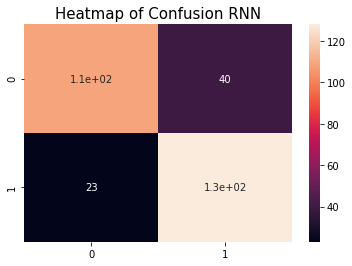

In [26]:
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
plt.title('Heatmap of Confusion RNN', fontsize = 15)
sns.heatmap(cm_rnn, annot = True)
plt.show()

In [27]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True negative = ', cm[0][0])
    print('False positive = ', cm[1][0])
    print('False negative = ', cm[0][1])
    print('True positive = ', cm[1][1])

In [28]:
print_confusion_matrix(y_test, y_pred_rnn)

True negative =  109
False positive =  23
False negative =  40
True positive =  128


In [29]:
fb_rf = fbeta_score(y_test, y_pred_rnn, beta=1)
fb_rf

0.8025078369905957